# Import Packages

In [42]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

# Import Dataset

In [43]:
data_df = pd.read_excel("Cell-Cycle-Set.xlsx")

#display(data_df)

# Clean Dataset

In [44]:
data_df = data_df.dropna()

# Data Analysis

In [45]:
#variance
data_df.var(numeric_only=True)

mean_RNA_G1         2.160506
mean_RNA_S          2.145592
mean_RNA_G2         2.101649
mean_protein_G1    10.453574
mean_protein_S     10.403018
mean_protein_G2    10.018217
dtype: float64

In [46]:
#mean
data_df.mean(numeric_only=True)

mean_RNA_G1        11.215627
mean_RNA_S         11.186962
mean_RNA_G2        11.257939
mean_protein_G1    25.351672
mean_protein_S     22.847658
mean_protein_G2    25.573553
dtype: float64

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

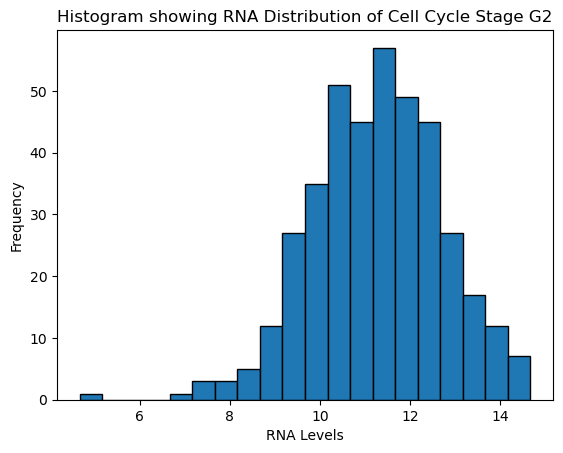

In [47]:
#histogram for G1 RNA
plt.hist(data_df['mean_RNA_G2'], bins=20, edgecolor = "black")
plt.title("Histogram showing RNA Distribution of Cell Cycle Stage G2")
plt.ylabel("Frequency")
plt.xlabel("RNA Levels")
plt.plot


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

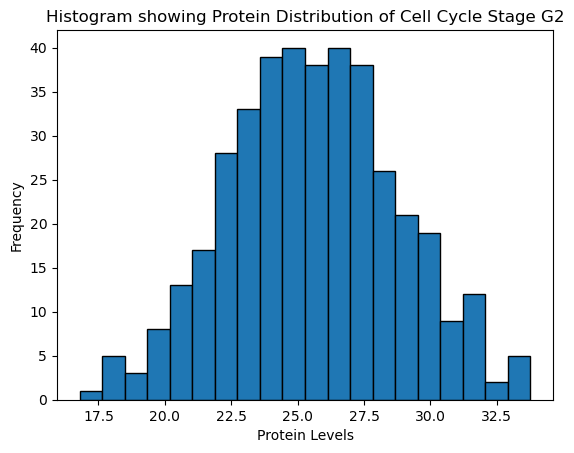

In [48]:
#histogram for G1 Protein
plt.hist(data_df['mean_protein_G2'], bins=20, edgecolor = "black")
plt.title("Histogram showing Protein Distribution of Cell Cycle Stage G2")
plt.ylabel("Frequency")
plt.xlabel("Protein Levels")
plt.plot


Both Normal Distributions

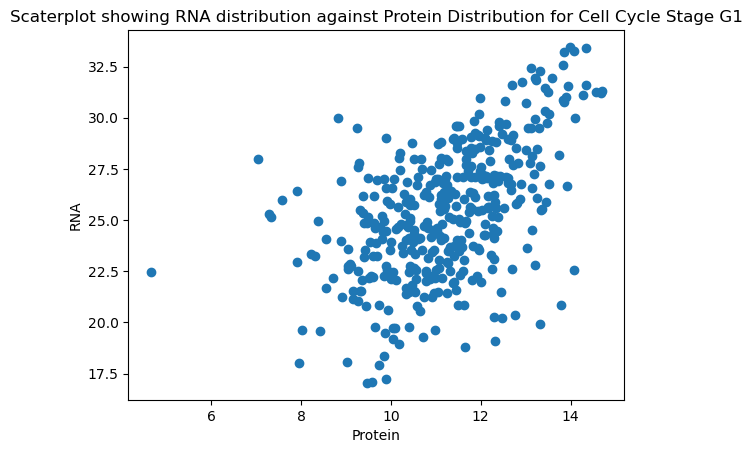

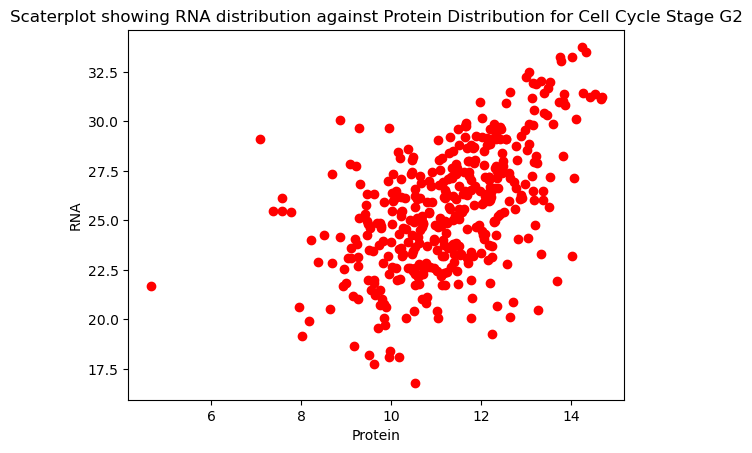

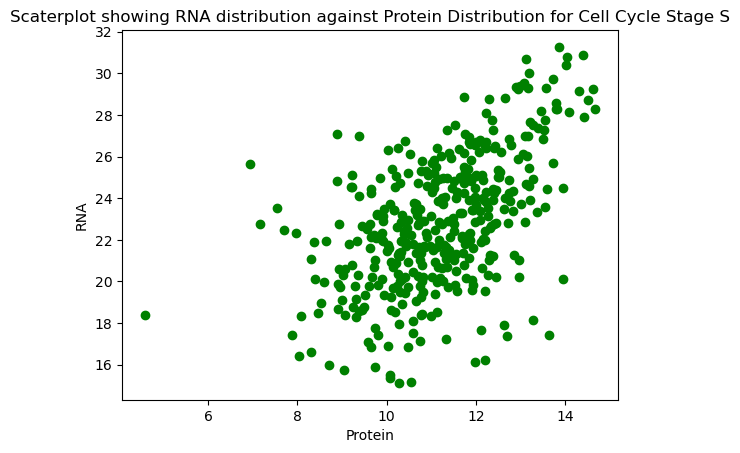

In [49]:
#scatterplots

#G1
#plt.figure(figsize=(12,8))
plt.scatter(data_df['mean_RNA_G1'], data_df['mean_protein_G1'])
plt.title("Scaterplot showing RNA distribution against Protein Distribution for Cell Cycle Stage G1")
plt.ylabel("RNA")
plt.xlabel("Protein")
plt.plot
plt.show()

#G2
#plt.figure(figsize=(12,8))
plt.scatter(data_df['mean_RNA_G2'], data_df['mean_protein_G2'], color='red')
plt.title("Scaterplot showing RNA distribution against Protein Distribution for Cell Cycle Stage G2")
plt.ylabel("RNA")
plt.xlabel("Protein")
plt.plot
plt.show()

#S
#plt.figure(figsize=(12,8))
plt.scatter(data_df['mean_RNA_S'], data_df['mean_protein_S'], color='green')
plt.title("Scaterplot showing RNA distribution against Protein Distribution for Cell Cycle Stage S")
plt.ylabel("RNA")
plt.xlabel("Protein")
plt.plot
plt.show()


# Linear Regression Model

0.2731711059314552


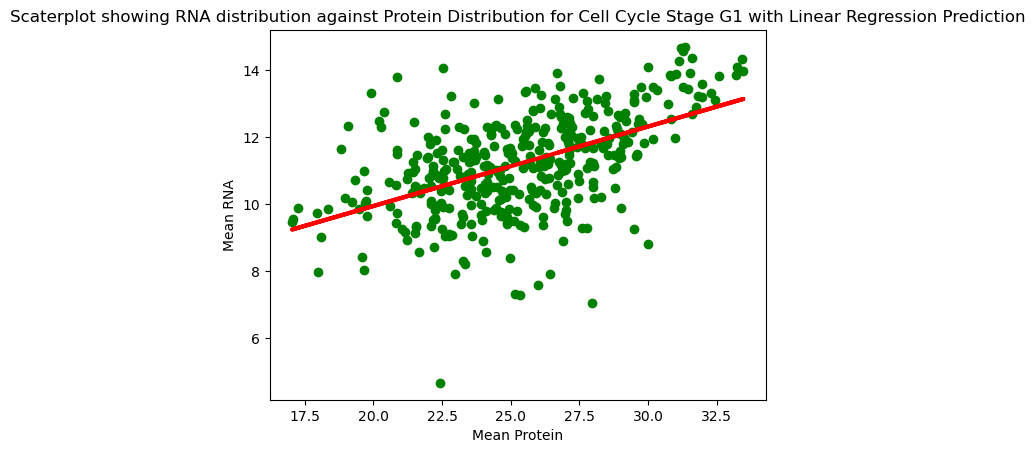

In [57]:
from sklearn.linear_model import LinearRegression

x = data_df['mean_protein_G1'].values
x = x.reshape(x.size,1)
y = data_df['mean_RNA_G1'].values
y = y.reshape(y.size, 1)


reg = LinearRegression().fit(x,y)
print(reg.score(x,y))

#plt.figure(figsize=(12,8))
plt.scatter(x,y, color='green')
plt.title("Scaterplot showing RNA distribution against Protein Distribution for Cell Cycle Stage G1 with Linear Regression Prediction")
plt.xlabel("Mean Protein")
plt.ylabel("Mean RNA")
plt.plot(x, reg.predict(x), color='red', linewidth=3)
plt.show()


Use MSE or R-squared to quantify

# Part 2

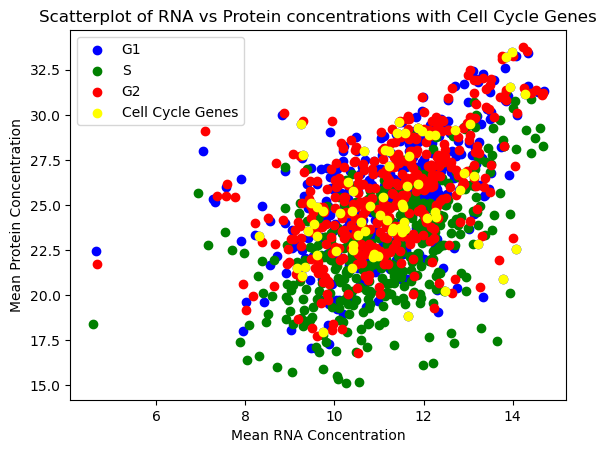

Correlation matrix for cell cycle genes:
                 mean_RNA_G1  mean_RNA_S  mean_RNA_G2  mean_protein_G1  \
mean_RNA_G1         1.000000    0.993228     0.974701         0.436546   
mean_RNA_S          0.993228    1.000000     0.980132         0.442141   
mean_RNA_G2         0.974701    0.980132     1.000000         0.428266   
mean_protein_G1     0.436546    0.442141     0.428266         1.000000   
mean_protein_S      0.434837    0.438388     0.426218         0.992084   
mean_protein_G2     0.453532    0.457854     0.453327         0.991121   

                 mean_protein_S  mean_protein_G2  
mean_RNA_G1            0.434837         0.453532  
mean_RNA_S             0.438388         0.457854  
mean_RNA_G2            0.426218         0.453327  
mean_protein_G1        0.992084         0.991121  
mean_protein_S         1.000000         0.986301  
mean_protein_G2        0.986301         1.000000  


In [66]:
#find genes that contain 'cell cycle' in GOBP

# filter genes with cell cycle
cell_cycle_genes = data_df[data_df['GOBP'].str.contains('cell cycle', case=False)]

# scatter plot for different stages of cell cycle
#plt.figure(figsize=(15, 10))
stages = ['G1', 'S', 'G2']
colors = ['blue', 'green', 'red']

for i, stage in enumerate(stages):
    plt.scatter(data_df[f'mean_RNA_{stage}'], data_df[f'mean_protein_{stage}'], label=stage, color=colors[i])

plt.scatter(cell_cycle_genes['mean_RNA_G1'], cell_cycle_genes['mean_protein_G1'], label='Cell Cycle Genes', color='yellow')
plt.xlabel('Mean RNA Concentration')
plt.ylabel('Mean Protein Concentration')
plt.title('Scatterplot of RNA vs Protein concentrations with Cell Cycle Genes')
plt.legend()
plt.show()

# Calculate correlations
corr = cell_cycle_genes[['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2', 'mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']].corr()
print("Correlation matrix for cell cycle genes:")
print(corr)




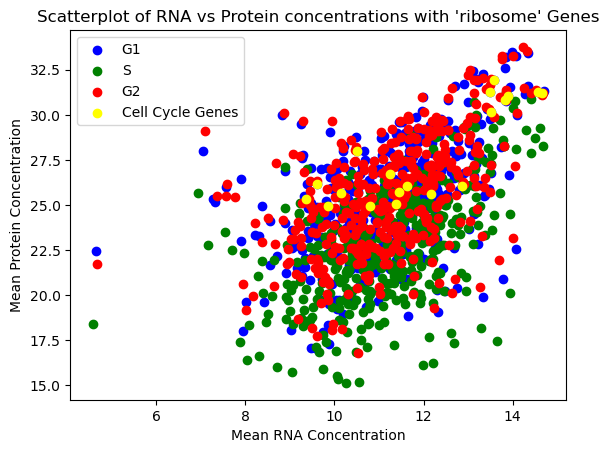

Correlation matrix for cell cycle genes:
                 mean_RNA_G1  mean_RNA_S  mean_RNA_G2  mean_protein_G1  \
mean_RNA_G1         1.000000    0.997851     0.999540         0.840801   
mean_RNA_S          0.997851    1.000000     0.996900         0.832572   
mean_RNA_G2         0.999540    0.996900     1.000000         0.836108   
mean_protein_G1     0.840801    0.832572     0.836108         1.000000   
mean_protein_S      0.848882    0.844801     0.844280         0.990856   
mean_protein_G2     0.852274    0.845251     0.847706         0.998165   

                 mean_protein_S  mean_protein_G2  
mean_RNA_G1            0.848882         0.852274  
mean_RNA_S             0.844801         0.845251  
mean_RNA_G2            0.844280         0.847706  
mean_protein_G1        0.990856         0.998165  
mean_protein_S         1.000000         0.990858  
mean_protein_G2        0.990858         1.000000  


In [63]:
#find genes that contain 'ribosome' in GOCC

# filter genes with cell cycle
ribo_genes = data_df[data_df['GOCC'].str.contains('ribosome', case=False)]

# scatter plot for different stages of cell cycle
#plt.figure(figsize=(15, 10))
stages = ['G1', 'S', 'G2']
colors = ['blue', 'green', 'red']

for i, stage in enumerate(stages):
    plt.scatter(data_df[f'mean_RNA_{stage}'], data_df[f'mean_protein_{stage}'], label=stage, color=colors[i])

plt.scatter(ribo_genes['mean_RNA_G1'], ribo_genes['mean_protein_G1'], label='Cell Cycle Genes', color='yellow')
plt.xlabel('Mean RNA Concentration')
plt.ylabel('Mean Protein Concentration')
plt.title('Scatterplot of RNA vs Protein concentrations with \'ribosome\' Genes')
plt.legend()
plt.show()

# Calculate correlations
corr = ribo_genes[['mean_RNA_G1', 'mean_RNA_S', 'mean_RNA_G2', 'mean_protein_G1', 'mean_protein_S', 'mean_protein_G2']].corr()
print("Correlation matrix for cell cycle genes:")
print(corr)



In [53]:
from collections import Counter

gobp_terms = []
for terms in data_df['GOBP']:
    term_list = terms.split(';')
    gobp_terms.extend(term_list)

gobp_term_counts = Counter(gobp_terms)

sorted_terms = sorted(gobp_term_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted terms
for term, count in sorted_terms:
    print(f"{term}: {count}")


cellular process: 377
metabolic process: 273
cellular metabolic process: 260
primary metabolic process: 255
biological regulation: 236
regulation of biological process: 225
macromolecule metabolic process: 211
regulation of cellular process: 211
cellular macromolecule metabolic process: 201
nitrogen compound metabolic process: 167
cellular nitrogen compound metabolic process: 166
nucleobase-containing compound metabolic process: 158
response to stimulus: 148
cellular component organization or biogenesis: 145
nucleic acid metabolic process: 144
cellular component organization: 142
regulation of metabolic process: 141
regulation of cellular metabolic process: 130
regulation of primary metabolic process: 125
regulation of macromolecule metabolic process: 123
cellular component organization or biogenesis at cellular level: 122
RNA metabolic process: 119
cellular component organization at cellular level: 119
biosynthetic process: 118
cellular biosynthetic process: 117
cellular response to s

very long terms, 
very similar, 
very vague - 'cellular process'

In [59]:
# change in mRNA/protein levels

diff_df = pd.DataFrame()

diff_df['Gene_Name'] = data_df['Gene_Name']

diff_df['mRNA_change_G1_S'] = data_df['mean_RNA_S'] - data_df['mean_RNA_G1']
diff_df['mRNA_change_S_G2'] = data_df['mean_RNA_G2'] - data_df['mean_RNA_S']
diff_df['mRNA_change_G2_G1'] = data_df['mean_RNA_G1'] - data_df['mean_RNA_G2']

diff_df['protein_change_G1_S'] = data_df['mean_protein_S'] - data_df['mean_protein_G1']
diff_df['protein_change_S_G2'] = data_df['mean_protein_G2'] - data_df['mean_protein_S']
diff_df['protein_change_G2_G1'] = data_df['mean_protein_G1'] - data_df['mean_protein_G2']

# Standardize the differences by mean-centering and variance scaling
def standardize_diff(df, columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df[column + '_standardised'] = (df[column] - mean) / std

mRNA_diff_columns = ['mRNA_change_G1_S', 'mRNA_change_S_G2', 'mRNA_change_G2_G1']
protein_diff_columns = ['protein_change_G1_S', 'protein_change_S_G2', 'protein_change_G2_G1']

standardize_diff(diff_df, mRNA_diff_columns)
standardize_diff(diff_df, protein_diff_columns)

# Display the DataFrame with the standardized differences
display(diff_df)



,Gene_Name,mRNA_change_G1_S,mRNA_change_S_G2,mRNA_change_G2_G1,protein_change_G1_S,protein_change_S_G2,protein_change_G2_G1,mRNA_change_G1_S_standardised,mRNA_change_S_G2_standardised,mRNA_change_G2_G1_standardised,protein_change_G1_S_standardised,protein_change_S_G2_standardised,protein_change_G2_G1_standardised
1,RBM47,0.066317,0.280833,-0.347150,-2.321243,2.224423,0.096820,0.484022,0.885752,-1.643492,0.232171,-0.713206,0.462402
2,ADAM9,-0.117710,0.029663,0.088047,-2.834720,3.032403,-0.197683,-0.453771,-0.174376,0.702814,-0.420091,0.435924,0.035108
3,UBA6,-0.068870,-0.072617,0.141487,-3.258017,3.851433,-0.593417,-0.204884,-0.606075,0.990929,-0.957799,1.600770,-0.539059
5,SHTN1,-0.021170,-0.189367,0.210537,-3.206763,3.232917,-0.026153,0.038193,-1.098848,1.363203,-0.892693,0.721100,0.283980
6,SIL1,-0.118345,0.111785,0.006560,-2.152293,2.495217,-0.342923,-0.457005,0.172240,0.263487,0.446786,-0.328077,-0.175620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,ALDH1B1,0.042560,0.276050,-0.318610,-2.159660,2.230430,-0.070770,0.362959,0.865563,-1.489622,0.437428,-0.704663,0.219246
495,MRPL12,0.099173,-0.095717,-0.003457,-1.750287,2.114670,-0.364383,0.651458,-0.703574,0.209486,0.957449,-0.869300,-0.206756
496,NQO1,0.166050,-0.130837,-0.035213,-2.958277,3.414777,-0.456500,0.992259,-0.851807,0.038274,-0.577043,0.979746,-0.340407
497,IFIT3,-0.448553,0.505122,-0.056569,-3.632877,3.639033,-0.006157,-2.139736,1.832420,-0.076861,-1.433978,1.298689,0.312993


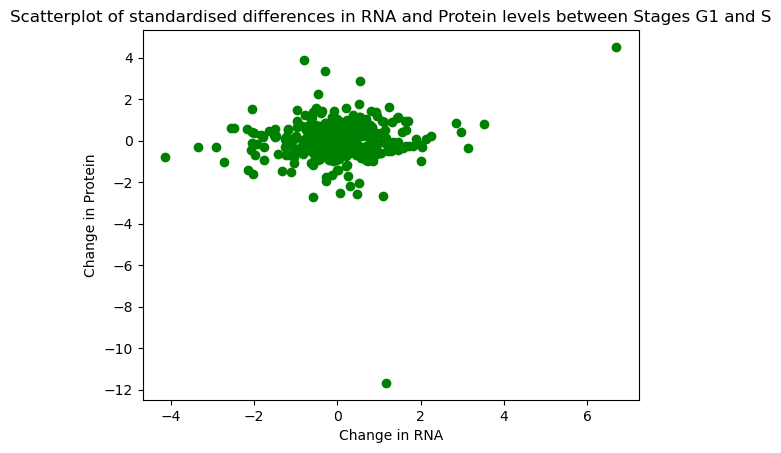

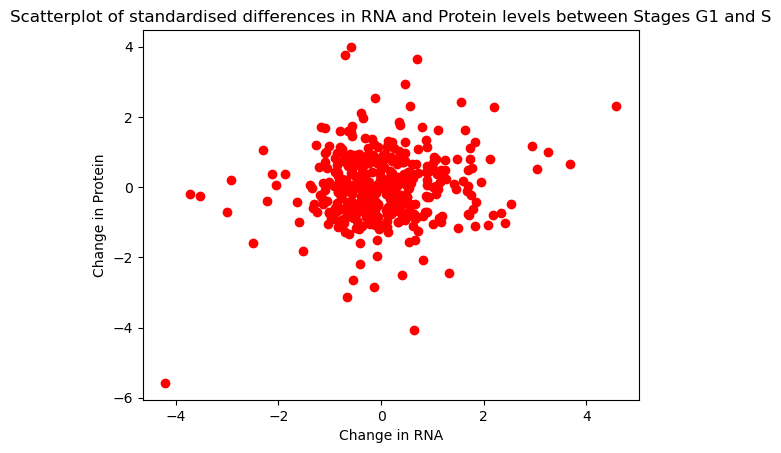

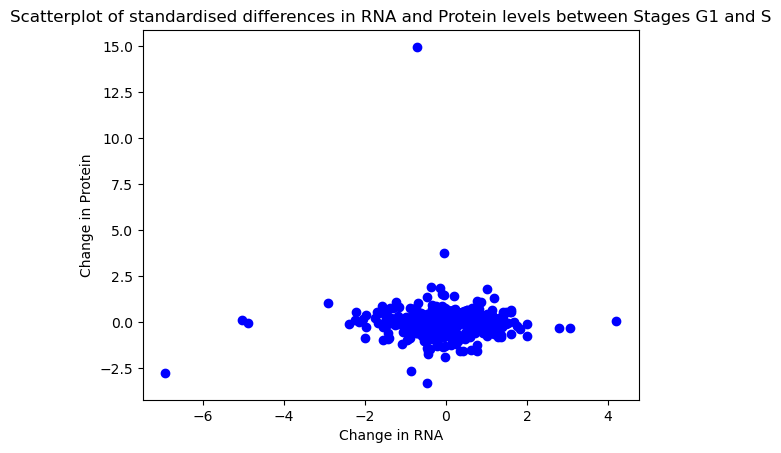

In [69]:
plt.scatter(diff_df['mRNA_change_G1_S_standardised'], diff_df['protein_change_G1_S_standardised'], color='green')
plt.xlabel('Change in RNA')
plt.ylabel('Change in Protein')
plt.title('Scatterplot of standardised differences in RNA and Protein levels between Stages G1 and S')
plt.show()

plt.scatter(diff_df['mRNA_change_S_G2_standardised'], diff_df['protein_change_S_G2_standardised'], color='red')
plt.xlabel('Change in RNA')
plt.ylabel('Change in Protein')
plt.title('Scatterplot of standardised differences in RNA and Protein levels between Stages G1 and S')
plt.show()

plt.scatter(diff_df['mRNA_change_G2_G1_standardised'], diff_df['protein_change_G2_G1_standardised'], color='blue')
plt.xlabel('Change in RNA')
plt.ylabel('Change in Protein')
plt.title('Scatterplot of standardised differences in RNA and Protein levels between Stages G1 and S')
plt.show()